In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import psycopg2
from sqlalchemy import create_engine, inspect
import scipy.stats as stats
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
username = "postgres"
password = "986877"
host = "localhost"
port = "5432"
database = "inventory"

# Create a connection string
conn = create_engine(f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}")


In [3]:
df = pd.read_sql_query('SELECT * FROM vendor_sales_summary',conn)
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalesPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080.0,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038.0,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407.0,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682.0,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109.0,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2.0,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6.0,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2.0,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1.0,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


In [50]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'ActualPrice', 'Volume', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesDollars',
       'TotalSalesPrice', 'TotalExciseTax', 'FreightCost', 'GrossProfit',
       'ProfitMargin', 'StockTurnOver', 'SalesPurchaseRatio',
       'UnitPurchasePrice', 'OrderSize', 'UnsoldInventorValue'],
      dtype='object')

In [51]:
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,...,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalesPurchaseRatio,UnitPurchasePrice,OrderSize,UnsoldInventorValue
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080.0,3811251.60,142049.0,...,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27,large,79624.37
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038.0,3804041.22,160247.0,...,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19,large,87913.29
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407.0,3418303.68,187140.0,...,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24,large,4870.08
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682.0,3261197.94,200412.0,...,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17,large,20535.90
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109.0,3023206.01,135838.0,...,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89,large,49712.19


# Exploratory Data Analysis
- Previously we examined the various tables in database to identify key variables, understand their relationships , and determine which ones should be included in the final analysis 
- In this phase of EDA, we will analyze the resultant table to gain insights into the distribustion of each column. This will help us to understand data patterns,
identify anomalies, and ensure data quality before proceeding with further analysis.

In [4]:
#summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


<function matplotlib.pyplot.show(close=None, block=None)>

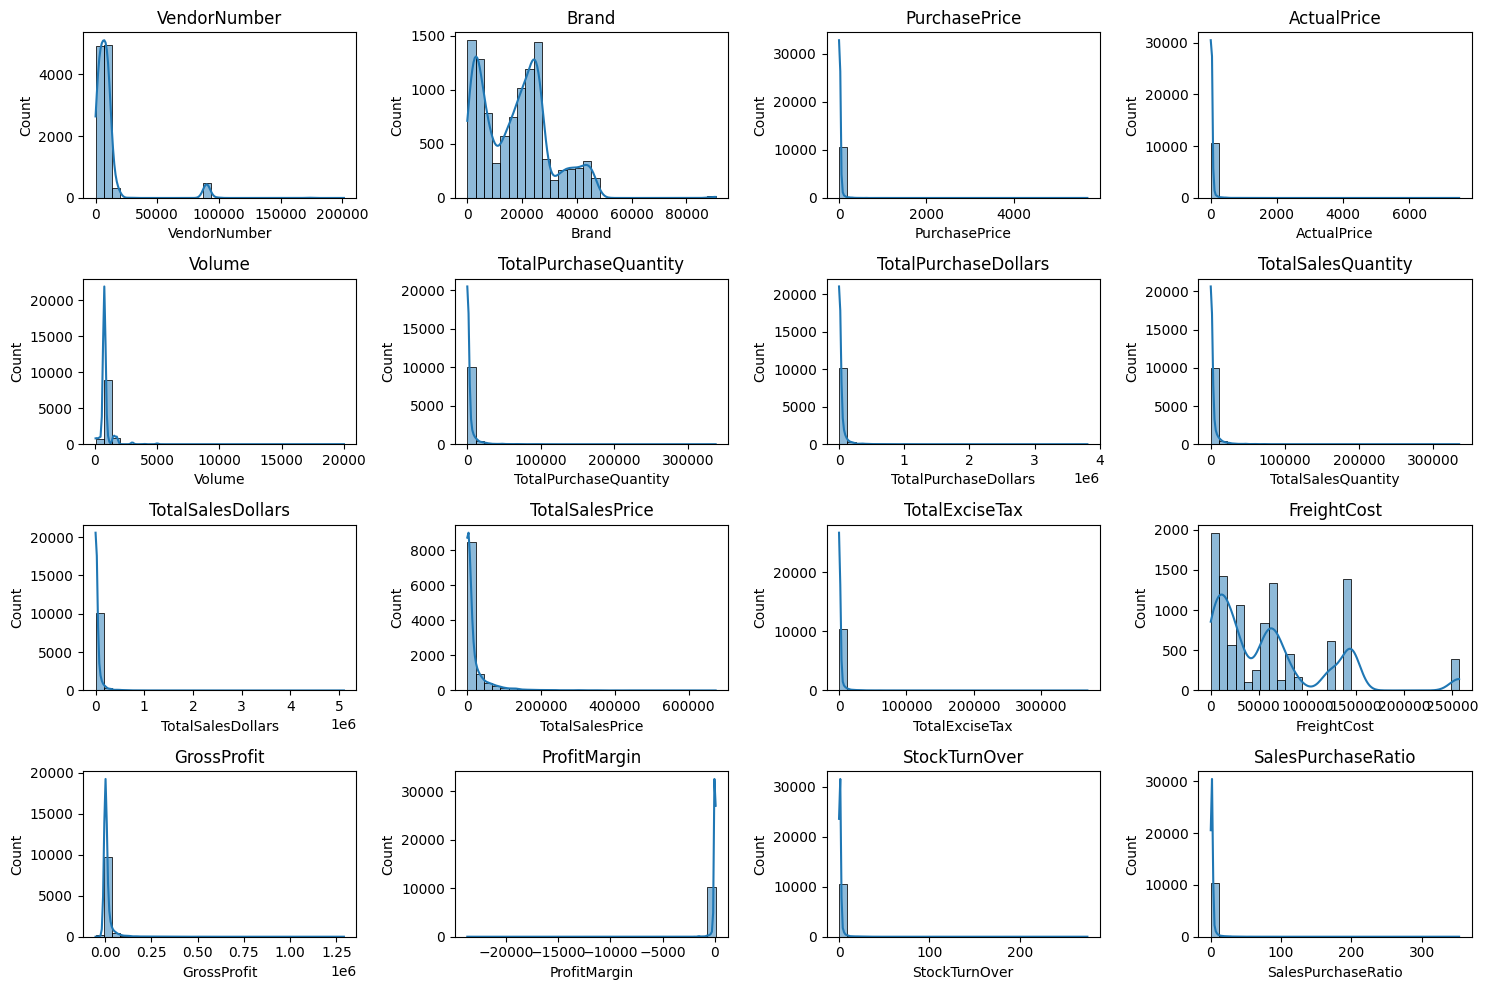

In [5]:
#Distribution Plots for Numerical columns
numerical_cols = df.select_dtypes(include = np.number).columns

plt.figure(figsize = (15,10))
for i , col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col], kde = True, bins = 30)
    plt.title(col)

plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

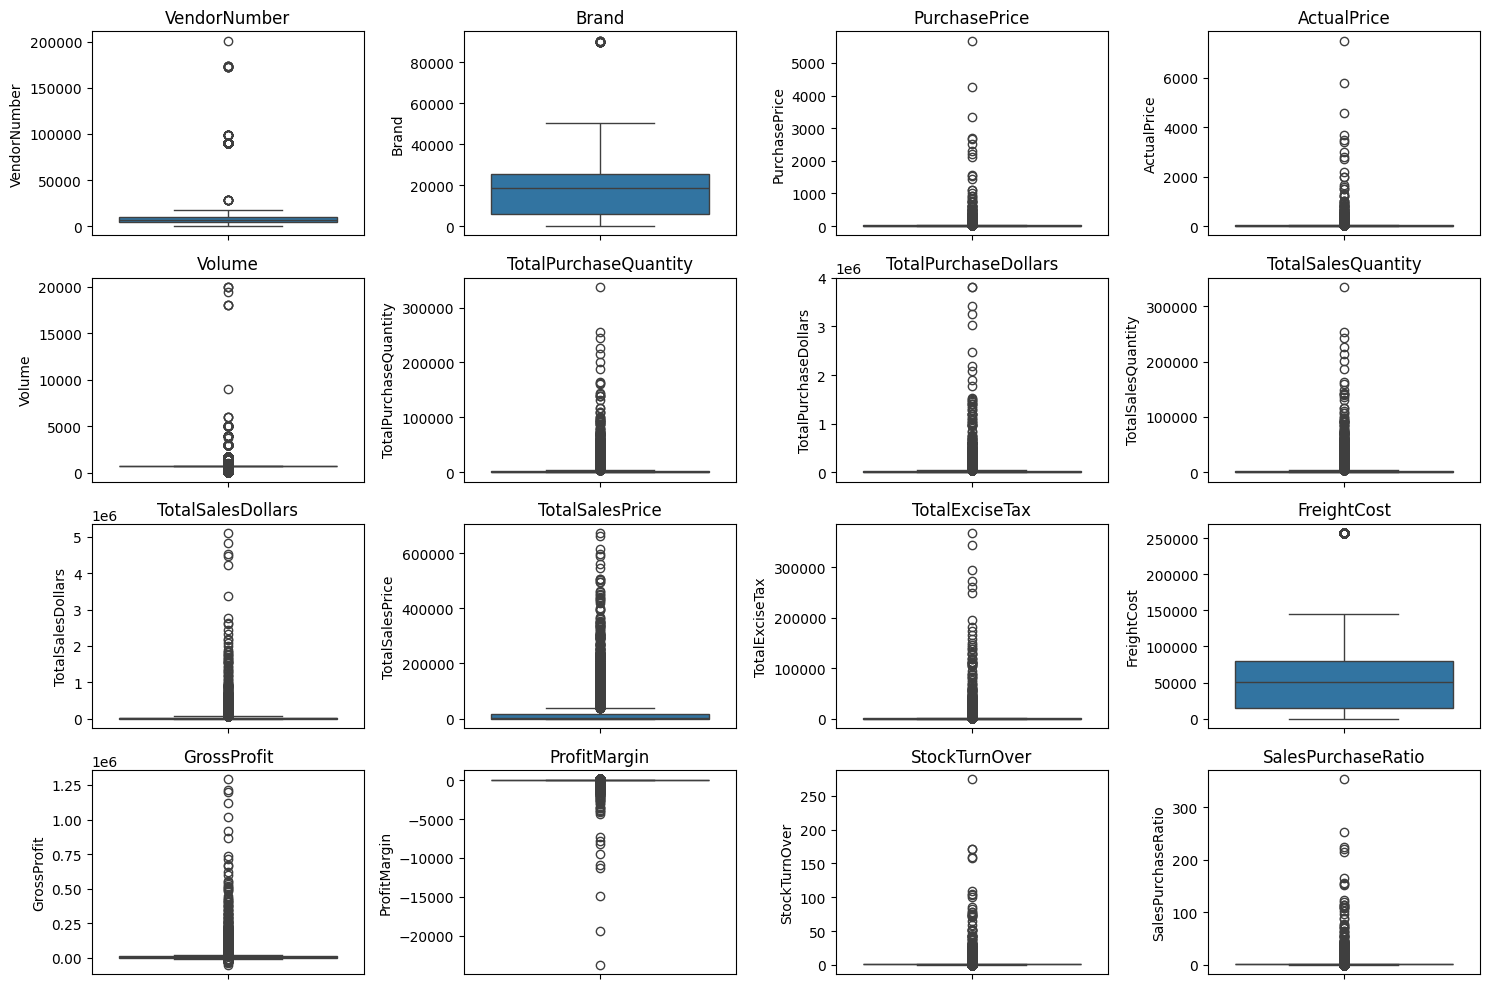

In [6]:
#boxplot to see outliers

plt.figure(figsize = (15,10))
for i , col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(y = df[col])
    plt.title(col)

plt.tight_layout()
plt.show

# Summary Statistics Insights
**Negative & zero values:**
- Gross Profit: Minimum value is -52,002,78, indicating losses. Some Products or transaction may be selling at a loss due to high costs or selling at discounts lower than the purchase price.
- Profit Margin: Has a minimum of -infinity, which suggests cases where revenue is zero or even lower than costs.
- Total Sales Quantity & Sales Dollars: Minimum Value are 0, meaning some products were purchases but never sold.These could be slow-moving or obsolete stock.

**Outliers Indicated by High Standard Deviations:**
- Purchase & Actual Price: The max values (5,681.81 & 7499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.
- Freight Cost: Huge variation, from 0.09 to 257,032.07, suggest logistics inefficiencies or bulk shipments.
- Stock TurnOver: Ranges from 0 to 274.5, implies some products sell extremly fast while other remain in stock indefinitely. Value more than 1 indicates that Sold quantity for that product is higher than purchased quantity due to either sales are being fullfilled from older stock.

In [7]:
df = pd.read_sql_query("""Select * FROM vendor_sales_summary
                           where "GrossProfit" > 0
                           AND "ProfitMargin" > 0
                           AND "TotalSalesQuantity" > 0""", conn)

In [8]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalesPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080.0,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038.0,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407.0,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682.0,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109.0,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2.0,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6.0,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2.0,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1.0,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


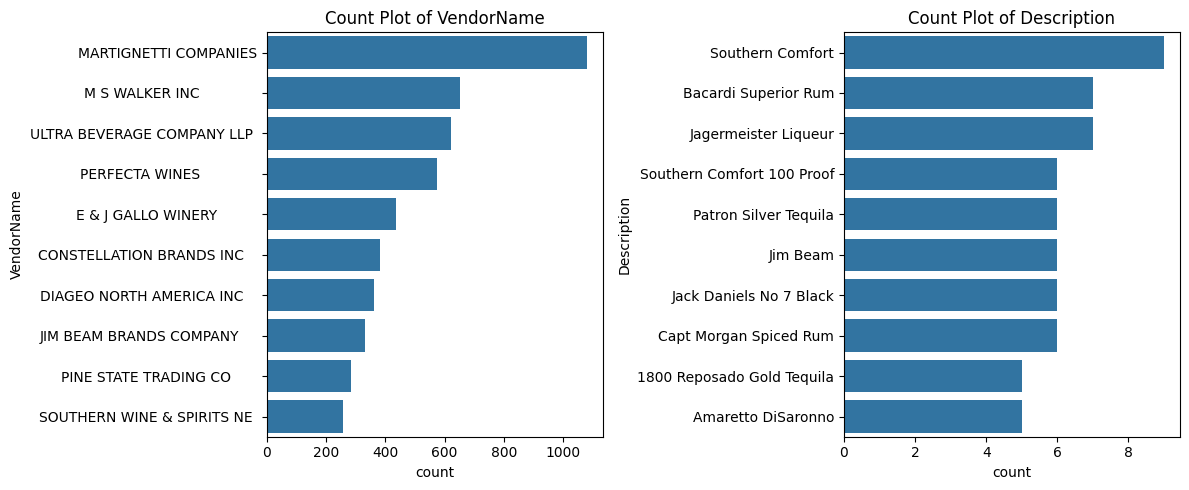

In [9]:
# Count Plot for Categorical columns
categorical_cols = ["VendorName","Description"]

plt.figure(figsize = (12,5))
for i,col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y = df[col], order = df[col].value_counts().index[:10]) #top 10
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

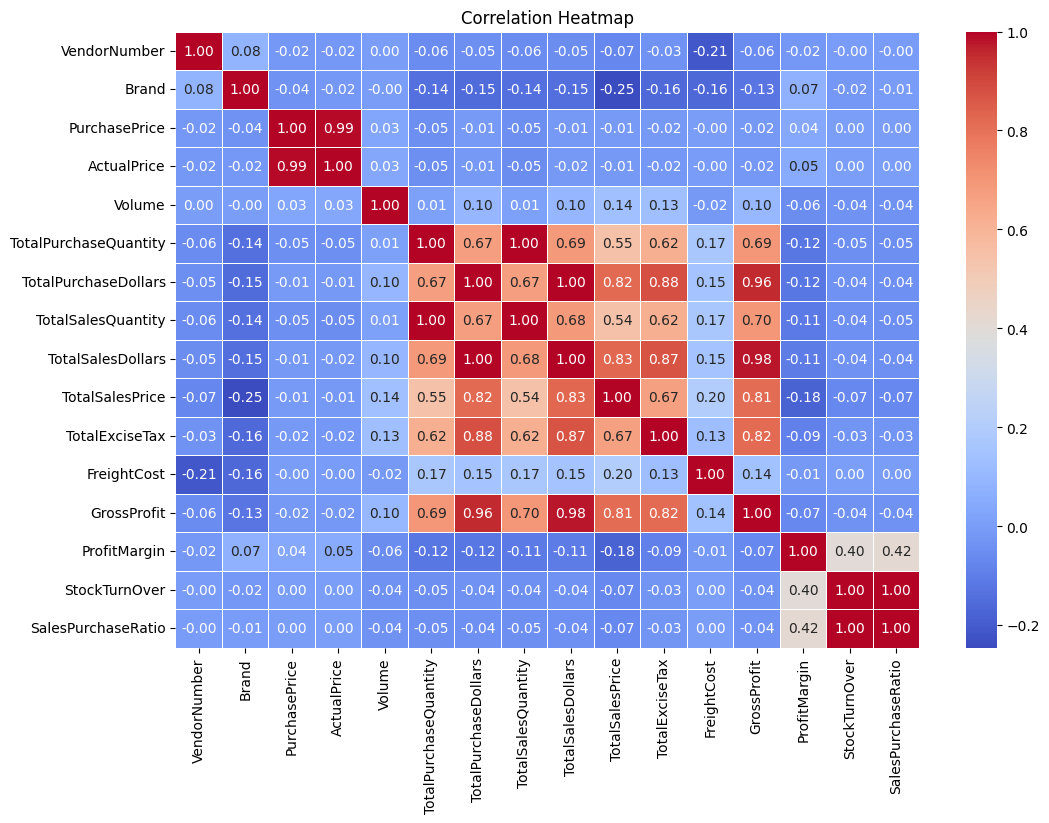

In [10]:
#Correlation Heatmap

plt.figure(figsize = (12,8))
correlation_matrix= df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot = True, fmt = ".2f", cmap = "coolwarm", linewidths = 0.5)
plt.title("Correlation Heatmap")
plt.show()

## Correlation Insights
- **PurchasePrice** has weak correlations with **TotalSalesDollars** (-0.012) and **GrossProfit**(-0.016), suggesting the price variation do not significantly impact sales revenue or profit.
- **Strong Correlation** between **total purchase quantity** and **total sales quantity**(0.99), confirming efficient inventory turnover.
- **Negative correlation** between **profit margin** & **total sales price**(-0.179) suggests that as sales price increases, margin decreases, possibly due to competitve pricing pressures.
- **StockTurnover** has weak negative correlations with both **GrossProfit**(-0.038) and **ProfitMargin**(-0.055), indicating that faster turnover does not necessarily result in higher profitablity.

# Data Analysis

Identify Brands that needs promotional or pricing adjustment which exibits lower sales performance but higher profit margin

In [11]:
brand_performance = df.groupby('Description') \
                      .agg({'TotalSalesDollars':'sum', 'ProfitMargin' : 'mean'}) \
                      .reset_index() \
                      .sort_values(by=['TotalSalesDollars', 'ProfitMargin'])
brand_performance

,Description,TotalSalesDollars,ProfitMargin
6942,Terruzzi & Puthod Vernaccia,4.99,32.464930
148,Albero Sparkling Wh Organic,5.79,28.497409
2897,Firefly Ridge Chard,5.79,31.088083
6488,Smirnoff Light Strawberry,5.94,50.168350
178,Allen's Blue Curacao Liqueur,5.99,20.033389
...,...,...,...
86,Absolut 80 Proof,6244752.03,27.051973
1272,Capt Morgan Spiced Rum,6356320.62,27.261764
3402,Grey Goose Vodka,7209608.06,25.413817
7114,Tito's Handmade Vodka,7399657.58,28.953634


In [12]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [13]:
print(f"Low Sales Threshold : {low_sales_threshold}")
print(f"High Margin Threshold : {high_margin_threshold}")

Low Sales Threshold : 560.299
High Margin Threshold : 64.97017552750113


In [14]:
# Filter brands with low sales but high profit margins
target_brands = brand_performance [
            (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
            (brand_performance['ProfitMargin'] >= high_margin_threshold)]

print("Brands with Low sales but High Profit Margin: ")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low sales but High Profit Margin: 


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [15]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars'] < 1000] #for better visulaization

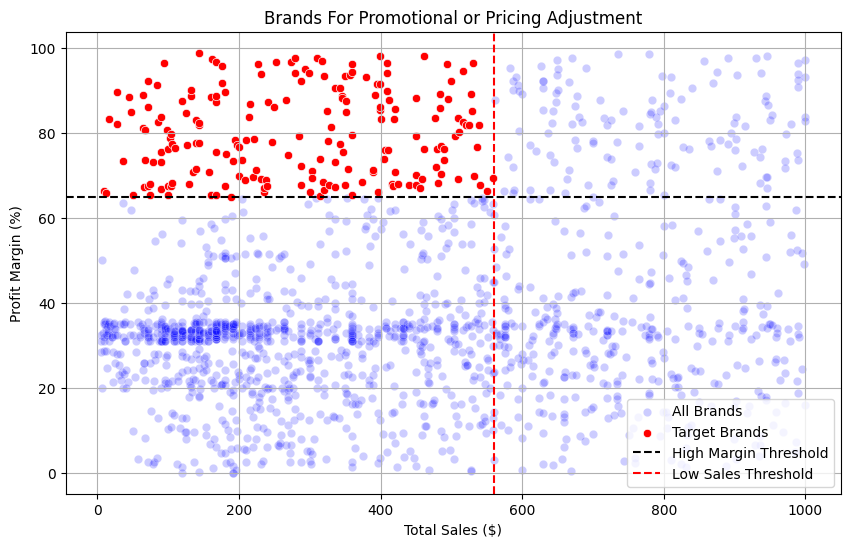

In [16]:
# Scatter Plot
plt.figure(figsize = (10,6))
sns.scatterplot(data = brand_performance, x = 'TotalSalesDollars', y = 'ProfitMargin', color = 'blue', label = 'All Brands', alpha = 0.2)
sns.scatterplot(data = target_brands, x = 'TotalSalesDollars', y = 'ProfitMargin', color = 'red', label = 'Target Brands')

plt.axhline(high_margin_threshold, linestyle = '--', color = 'black', label = 'High Margin Threshold')
plt.axvline(low_sales_threshold, linestyle = '--', color = 'red', label = 'Low Sales Threshold')

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands For Promotional or Pricing Adjustment")
plt.legend()
plt.grid(True)
plt.show()

Which vendors and brands demonstrate the highest sales performance?


In [17]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value/1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value/1_000:.2f}K"
    else:
        return str(value)

In [18]:
#Top Vendors and Brands by sales performance
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors

VendorName
DIAGEO NORTH AMERICA INC       6.799010e+07
MARTIGNETTI COMPANIES          3.927640e+07
PERNOD RICARD USA              3.206320e+07
JIM BEAM BRANDS COMPANY        3.142302e+07
BACARDI USA INC                2.485482e+07
CONSTELLATION BRANDS INC       2.421875e+07
E & J GALLO WINERY             1.839990e+07
BROWN-FORMAN CORP              1.824723e+07
ULTRA BEVERAGE COMPANY LLP     1.650254e+07
M S WALKER INC                 1.470646e+07
Name: TotalSalesDollars, dtype: float64

In [19]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [20]:
top_brands.apply(lambda x : format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

In [21]:
top_vendors.apply(lambda x : format_dollars(x))

VendorName
DIAGEO NORTH AMERICA INC       67.99M
MARTIGNETTI COMPANIES          39.28M
PERNOD RICARD USA              32.06M
JIM BEAM BRANDS COMPANY        31.42M
BACARDI USA INC                24.85M
CONSTELLATION BRANDS INC       24.22M
E & J GALLO WINERY             18.40M
BROWN-FORMAN CORP              18.25M
ULTRA BEVERAGE COMPANY LLP     16.50M
M S WALKER INC                 14.71M
Name: TotalSalesDollars, dtype: object

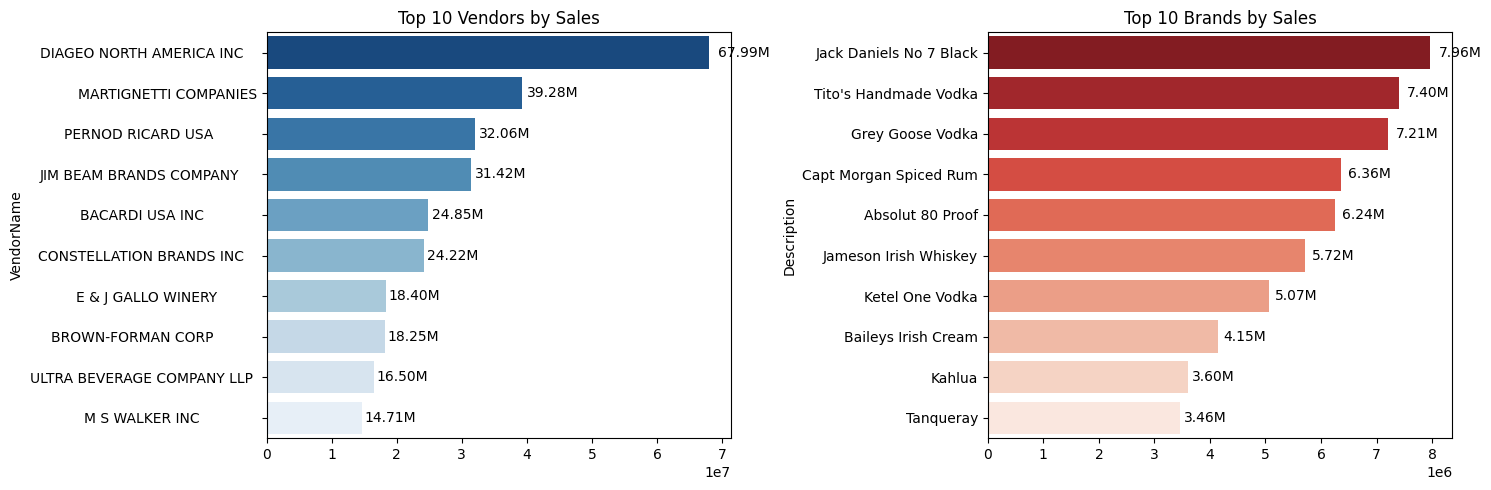

In [22]:
plt.figure(figsize = (15,5))

#Plot for Top Vendors
plt.subplot(1,2,1)
ax1 = sns.barplot(y = top_vendors.index, x = top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height()/2,
             format_dollars(bar.get_width()),
             ha = 'left', va = 'center', fontsize = 10, color = 'black')

#Plot for top 10 Brands
plt.subplot(1,2,2)
ax2 = sns.barplot(y = top_brands.index.astype(str), x = top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height()/2,
             format_dollars(bar.get_width()),
             ha = 'left', va = 'center', fontsize = 10, color = 'black')

plt.tight_layout()
plt.show()
    

Which Vendor contributes the most to the total purchase Dollars

In [23]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars': 'sum',
    'GrossProfit' : 'sum',
    'TotalSalesDollars': 'sum'}).reset_index()

In [24]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()*100
                   

In [25]:
vendor_performance.columns

Index(['VendorName', 'TotalPurchaseDollars', 'GrossProfit',
       'TotalSalesDollars', 'PurchaseContribution%'],
      dtype='object')

In [26]:
vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53,0.000145
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94,0.008362
2,ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81,0.003809
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16,0.000304
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53,0.033981
...,...,...,...,...,...
115,WEIN BAUER INC,42694.64,13522.49,56217.13,0.013892
116,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83,0.097097
117,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20,1.912074
118,WINE GROUP INC,5203801.17,3100242.11,8304043.28,1.693183


In [27]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%', ascending = False),2)

In [28]:
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.46M,13.81M,39.28M,8.29
69,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
107,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [29]:
top_vendors['PurchaseContribution%'].sum()

65.68

## Key takes:
- Top 10 vendors contributes ~66% to overall PurchaseDollars.
- Remaining 106 (116-10) vendors contribute 36% only.

In [30]:
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative_Contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.46M,13.81M,39.28M,8.29,24.59
69,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.35
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,39.99
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.66
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.63
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.94
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.87
107,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.50
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.68


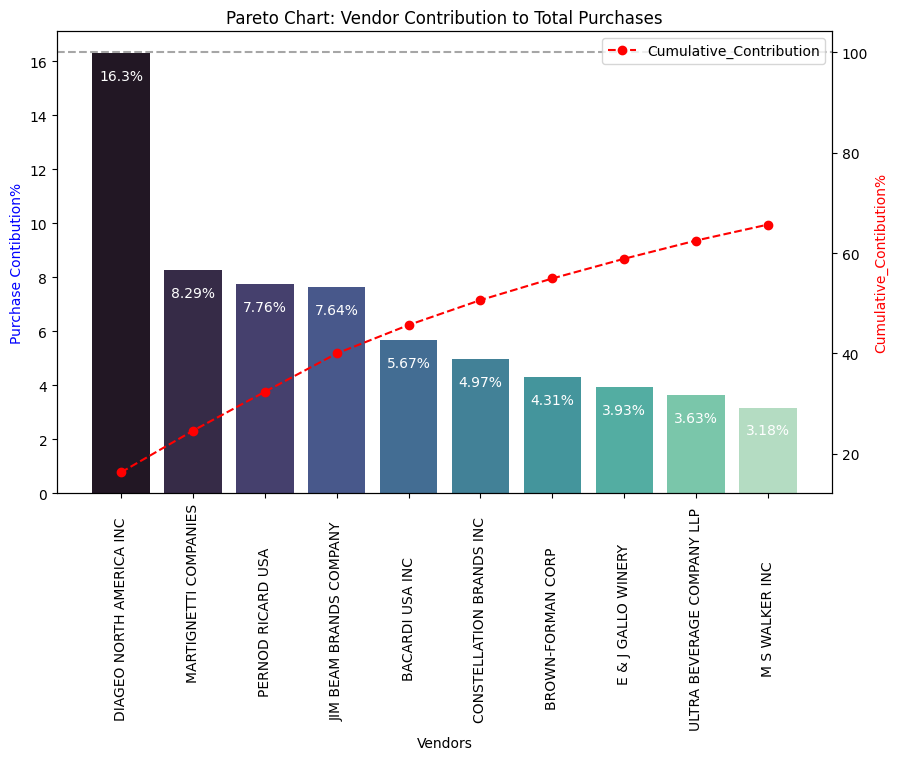

In [31]:
fig, ax1 = plt.subplots(figsize = (10,6))

# Bar Plot for purchase contribution
sns.barplot(x = top_vendors['VendorName'], y = top_vendors['PurchaseContribution%'], palette = "mako", ax = ax1)

for i,value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value - 1, str(value)+'%', ha = 'center', fontsize = 10, color = 'white')

#line plot Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color = 'red', marker = 'o', linestyle = 'dashed', label = 'Cumulative_Contribution')

ax1.set_xticklabels(top_vendors['VendorName'], rotation = 90)
ax1.set_ylabel('Purchase Contibution%', color = 'blue')
ax2.set_ylabel('Cumulative_Contibution%', color = 'red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y = 100, color = 'gray', linestyle = 'dashed', alpha = 0.7)
ax2.legend(loc = 'upper right')

plt.show()

In [32]:
top_vendors.columns

Index(['VendorName', 'TotalPurchaseDollars', 'GrossProfit',
       'TotalSalesDollars', 'PurchaseContribution%',
       'Cumulative_Contribution%'],
      dtype='object')

How much of the total procurement is dependent on the top vendors? 

In [33]:
print(f"Total Purchase Contribution of the top 10 vendor is {round(top_vendors['PurchaseContribution%'].sum(),2 )} %")

Total Purchase Contribution of the top 10 vendor is 65.68 %


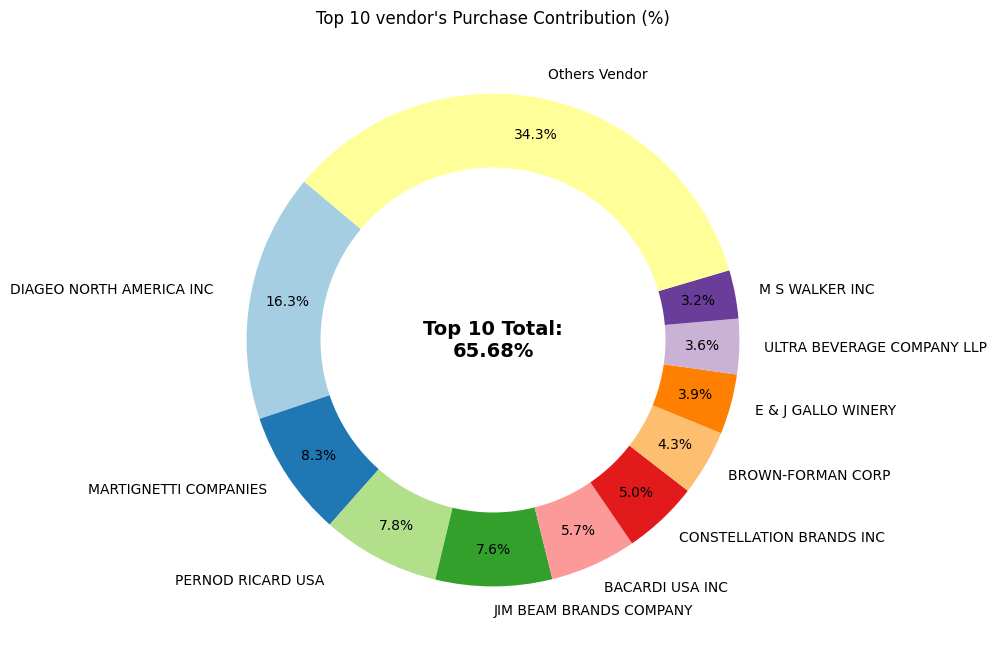

In [34]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions= list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

#Append "other Vendors" category
vendors.append("Others Vendor")
purchase_contributions.append(remaining_contribution)

#Donut Chart
fig, ax = plt.subplots(figsize = (8,8))
wedges, texts,autotexts = ax.pie(purchase_contributions, labels = vendors, autopct = '%1.1f%%',
                                startangle = 140, pctdistance = 0.85,colors = plt.cm.Paired.colors)

#Draw the white circle in the center to create a donut effect
center_circle = plt.Circle((0,0),0.70, fc = 'white')
fig.gca().add_artist(center_circle)

#Add total contribution annotation in the center
plt.text(0,0,f"Top 10 Total:\n{total_contribution:.2f}%", fontsize = 14, fontweight = 'bold', ha = 'center', va = 'center')
plt.title("Top 10 vendor's Purchase Contribution (%)")
plt.show()

Does purchasing in bulk reduce the unit price? If yes, what is the optimal purcchase volume for cost savings?

In [35]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']


In [36]:
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'], q = 3, labels = ["Small","Medium","large"])

In [37]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean().reset_index()

,OrderSize,UnitPurchasePrice
0,Small,39.068186
1,Medium,15.486414
2,large,10.777625


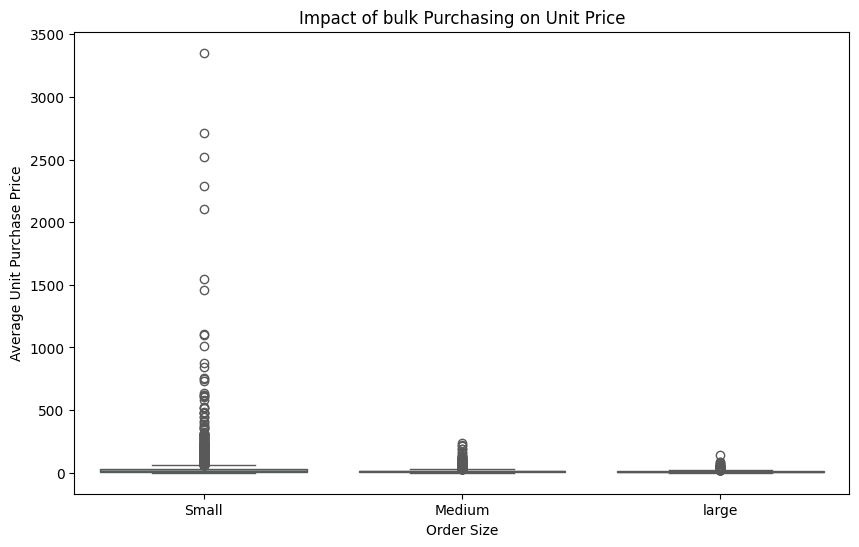

In [38]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df, x = "OrderSize", y = "UnitPurchasePrice", palette = "Set2")
plt.title("Impact of bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

## Key Takes:
- Vendors buying in bulk (Large Order size) get the lowest unit price ($10.78 per Unit), meaning higher margins if they can manage the inventory efficiently.
- The difference between Small and Large orders is substansial (~72% reduction in unit cost)
- This suggests that bulk pricing stratigies successfully encourage vendors to purchase in large volumes, leading to higher overall sales despite lower per-unit revenue.

#### 6. Which vendors have low inventory turnover, indicating excess stock and slow - moving products? 

In [39]:
df[df['StockTurnOver'] < 1].groupby('VendorName')[['StockTurnOver']].mean().sort_values("StockTurnOver", ascending = True).head(10)

,StockTurnOver
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


##### 7. How much capital is locked in unsold inventory per vendor and which vendors contribute the most to it?

In [40]:
df['UnsoldInventorValue'] = (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity'])*df['PurchasePrice']
print('Total Unsold Capital:', format_dollars(df["UnsoldInventorValue"].sum()))

Total Unsold Capital: 2.71M


In [42]:
inventor_value_per_vendor = df.groupby("VendorName")["UnsoldInventorValue"].sum().reset_index()

#sort vendors with highest Locked Capital
inventor_value_per_vendor = inventor_value_per_vendor.sort_values(by = "UnsoldInventorValue", ascending = False)
inventor_value_per_vendor['UnsoldInventorValue'] = inventor_value_per_vendor["UnsoldInventorValue"].apply(format_dollars)
inventor_value_per_vendor.head(10)

,VendorName,UnsoldInventorValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
69,PERNOD RICARD USA,470.63K
117,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
80,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
62,MOET HENNESSY USA INC,126.48K
78,REMY COINTREAU USA INC,118.60K


#### 8.What is the 95% confidence intervals for the profit margins of top-performing and low-performing vendors

In [43]:
top_thresold = df["TotalSalesDollars"].quantile(0.75)
bottom_thresold = df["TotalSalesDollars"].quantile(0.25)

In [44]:
top_vendors = df[df["TotalSalesDollars"] >= top_thresold]["ProfitMargin"].dropna()
bottom_vendors = df[df["TotalSalesDollars"] <= bottom_thresold]["ProfitMargin"].dropna()

In [45]:
top_vendors

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
3525    79.684817
3683    85.782102
4752    93.085860
4921    95.012530
5051    94.271857
Name: ProfitMargin, Length: 2141, dtype: float64

In [46]:
def confidence_interval(data, confidence = 0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof = 1)/np.sqrt(len(data)) #standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df = len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val+margin_of_error

Top Vendors 95% CI: (30.74, 31.61), Mean: 31.18
Low Vendors 95% CI: (40.50, 42.64), Mean: 41.57


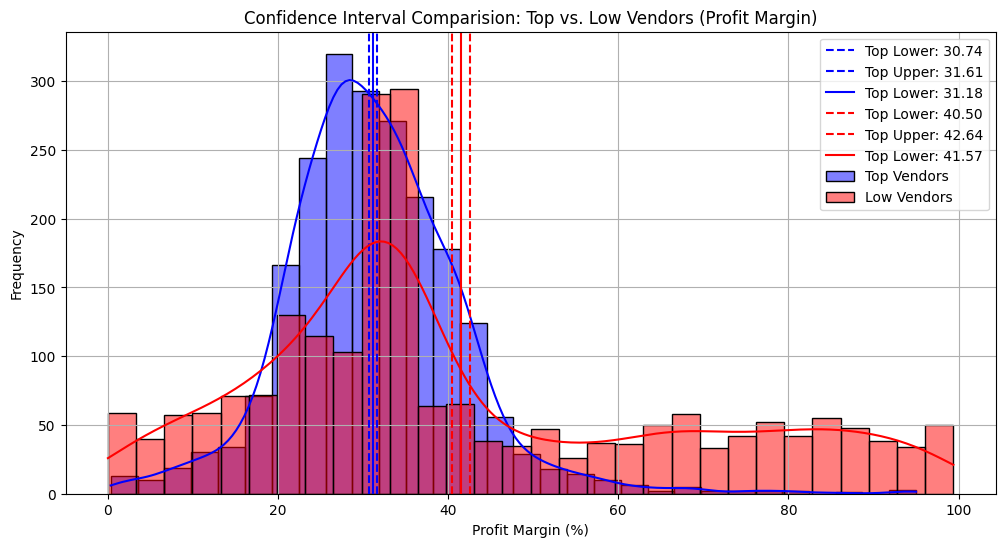

In [47]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean , low_lower, low_upper = confidence_interval(bottom_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize = (12,6))

#Top vendor plot
sns.histplot(top_vendors, kde = True, color = 'blue', bins = 30, alpha = 0.5, label = "Top Vendors")
plt.axvline(top_lower, color = "blue", linestyle = "--", label = f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color = "blue", linestyle = "--", label = f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color = "blue", linestyle = "-", label = f"Top Lower: {top_mean:.2f}")

#Low vendor plot
sns.histplot(bottom_vendors, kde = True, color = 'red', bins = 30, alpha = 0.5, label = "Low Vendors")
plt.axvline(low_lower, color = "red", linestyle = "--", label = f"Top Lower: {low_lower:.2f}")
plt.axvline(low_upper, color = "red", linestyle = "--", label = f"Top Upper: {low_upper:.2f}")
plt.axvline(low_mean, color = "red", linestyle = "-", label = f"Top Lower: {low_mean:.2f}")

#finalize the plot
plt.title("Confidence Interval Comparision: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)

plt.show()

- The confidence interval for low-performing vendors (40.48% to 42.62%) is significantly higher than that of top-performing vendors (30.74% to 31.61%).
- This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.
- For High-Performing Vendors: If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bundling strategies.
- For Low-Performing Vendors: Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing, or improved
distribution strategies.

## Is there a significant difference in profit margins between top-performing and low-performing vendors?
Hypothesis:
- Ho (Null Hypothesis): There is no significant difference in the mean girofit margins of top-performing and Iow-performing vendors.
- H1 (Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different.

In [48]:
from scipy.stats import ttest_ind

top_threshold = df["TotalSalesDollars"].quantile(0.75)

low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
bottom_vendors = df[df["TotalSalesDollars"] <= low_threshold] ["ProfitMargin"].dropna()

# Perform Two—Sample T—Test
t_stat, p_value = ttest_ind(top_vendors, bottom_vendors, equal_var = False)

# Print results
print(f"T—Statistic: {t_stat:.4f}, P—VaIue: {p_value:.4f}" )

if p_value < 0.05:
    print("Reject Ho: There is a significant difference in profit margins between top and low—performing vendors." )
else:
    print("Fail to Reject Ho: No significant difference in profit margins." )

T—Statistic: -17.6695, P—VaIue: 0.0000
Reject Ho: There is a significant difference in profit margins between top and low—performing vendors.
